# Methodology and study procedure are described well. (2P)
Johannes

# Data of at least three participants is captured appropriatly. (3P)

already done

# Results are reported, compared, and discussed well. (2P)
Michael

In [61]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import math

# Load the CSV files
df1 = pd.read_csv('fittslaw_1.csv')     # participant 1
df2 = pd.read_csv('fittslaw_2.csv')     # participant 2
df3 = pd.read_csv('fittslaw_3.csv')     # participant 3

# Combine the DataFrames
df = pd.concat([df1, df2, df3], ignore_index=True)

# Convert Click Times from string to list
df['Click Times'] = df['Click Times'].apply(lambda x: json.loads(x))

# Calculate Index of Difficulty (ID)
df['ID'] = df.apply(lambda row: math.log2(2 * row['Distance'] / row['Radius']), axis=1)

# Separate data for each Input Device
mouse_data = df[df['Input Device'] == 'mouse']
touchpad_data = df[df['Input Device'] == 'touchpad']
mouselatency_data = df[df['Input Device'] == 'mouselatency']
pointing = df[df['Input Device'] == 'pointing']

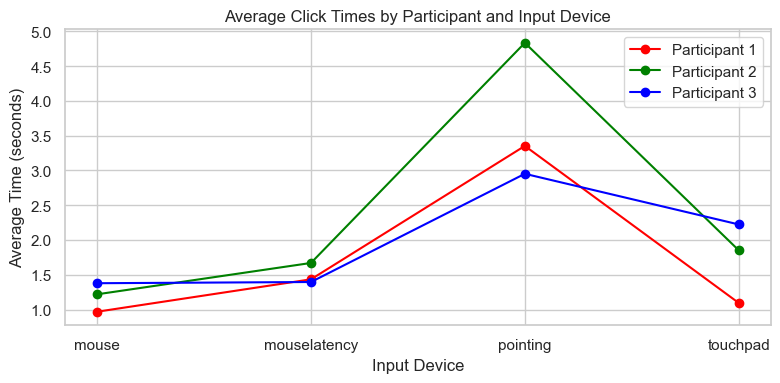

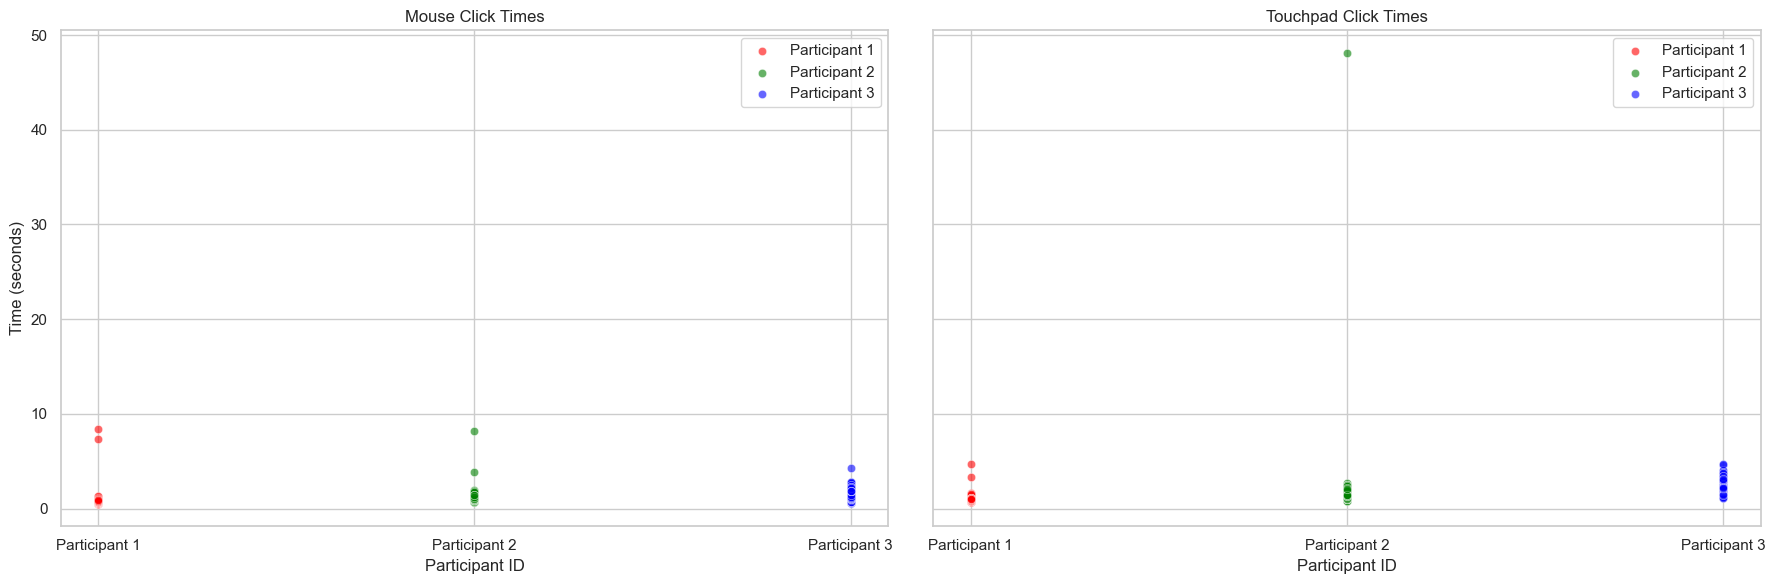

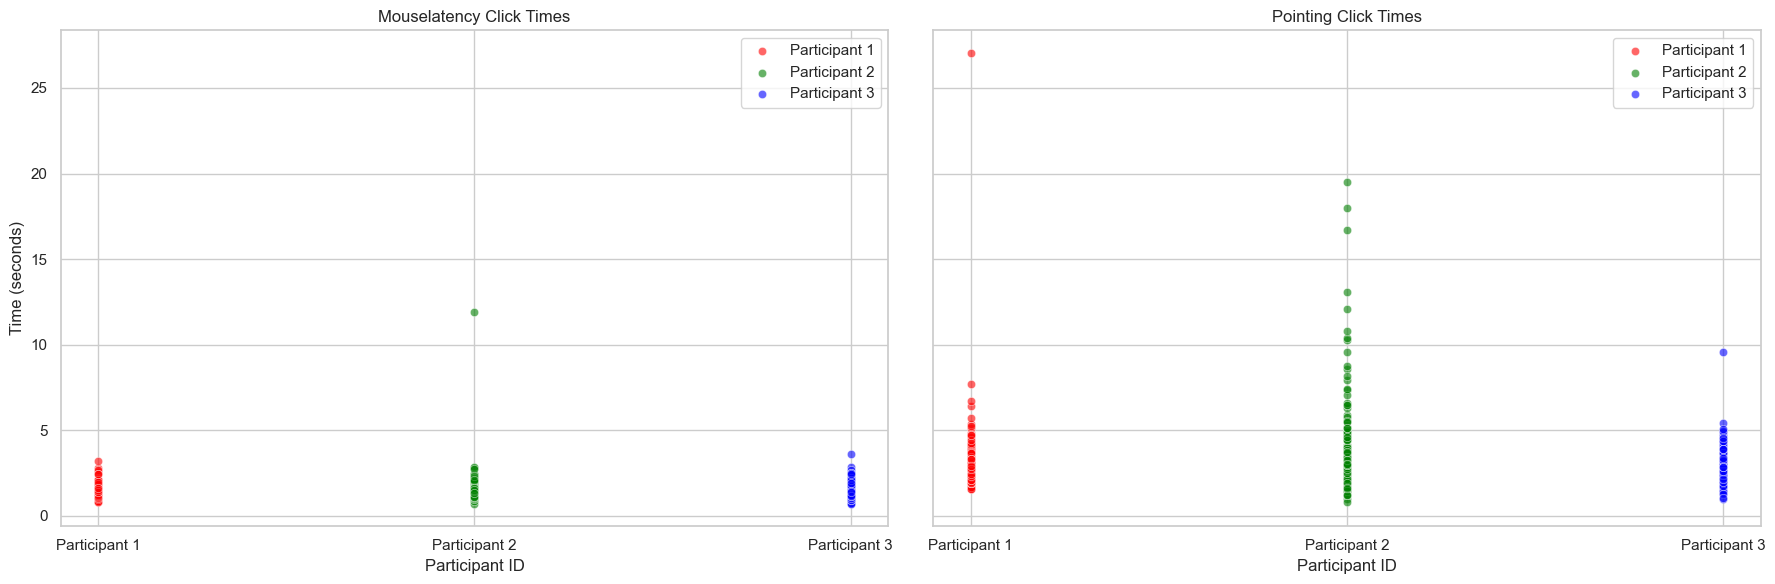

In [63]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import math

# Load the CSV files
df1 = pd.read_csv('fittslaw_1.csv')     # participant 1
df2 = pd.read_csv('fittslaw_2.csv')     # participant 2
df3 = pd.read_csv('fittslaw_3.csv')     # participant 3

# Add Participant ID to each dataframe
df1['Participant ID'] = 1
df2['Participant ID'] = 2
df3['Participant ID'] = 3

# Combine the DataFrames
df = pd.concat([df1, df2, df3], ignore_index=True)

# Convert Click Times from string to list
df['Click Times'] = df['Click Times'].apply(lambda x: json.loads(x))

# Calculate Index of Difficulty (ID)
df['ID'] = df.apply(lambda row: math.log2(2 * row['Distance'] / row['Radius']), axis=1)

# Separate data for each Input Device
mouse_data = df[df['Input Device'] == 'mouse']
touchpad_data = df[df['Input Device'] == 'touchpad']
mouselatency_data = df[df['Input Device'] == 'mouselatency']
pointing_data = df[df['Input Device'] == 'pointing']

# Flatten click times for each participant and prepare for scatter plot
def prepare_scatter_data(device_data):
    scatter_data = []
    for idx, row in device_data.iterrows():
        participant_id = row['Participant ID']
        click_times = row['Click Times']
        scatter_data.extend([(participant_id, click_time) for click_time in click_times])
    return scatter_data

mouse_scatter_data = prepare_scatter_data(mouse_data)
touchpad_scatter_data = prepare_scatter_data(touchpad_data)
mouselatency_scatter_data = prepare_scatter_data(mouselatency_data)
pointing_scatter_data = prepare_scatter_data(pointing_data)

# Plotting function for scatter plots side by side with colors and legend
def plot_side_by_side(scatter_data1, device_name1, scatter_data2, device_name2):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
    colors = {1: 'red', 2: 'green', 3: 'blue'}
    labels = {1: 'Participant 1', 2: 'Participant 2', 3: 'Participant 3'}

    # First scatter plot
    for participant_id, color in colors.items():
        x = [participant_id] * sum(1 for pid, _ in scatter_data1 if pid == participant_id)
        y = [click_time for pid, click_time in scatter_data1 if pid == participant_id]
        axes[0].scatter(x, y, color=color, label=labels[participant_id], alpha=0.6, edgecolors='w', linewidth=0.5)
    axes[0].set_xticks([1, 2, 3])
    axes[0].set_xticklabels(['Participant 1', 'Participant 2', 'Participant 3'])
    axes[0].set_title(f'{device_name1.capitalize()} Click Times')
    axes[0].set_xlabel('Participant ID')
    axes[0].set_ylabel('Time (seconds)')
    axes[0].legend()

    # Second scatter plot
    for participant_id, color in colors.items():
        x = [participant_id] * sum(1 for pid, _ in scatter_data2 if pid == participant_id)
        y = [click_time for pid, click_time in scatter_data2 if pid == participant_id]
        axes[1].scatter(x, y, color=color, label=labels[participant_id], alpha=0.6, edgecolors='w', linewidth=0.5)
    axes[1].set_xticks([1, 2, 3])
    axes[1].set_xticklabels(['Participant 1', 'Participant 2', 'Participant 3'])
    axes[1].set_title(f'{device_name2.capitalize()} Click Times')
    axes[1].set_xlabel('Participant ID')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

    #-----------
    # Function to calculate average click times
def calculate_average_times(click_times):
    total_sum = sum(click_times, [])  # Flatten the list of lists
    num_elements = len(total_sum)
    if num_elements > 0:
        return sum(total_sum) / num_elements
    else:
        return 0

# Group by Participant ID and Input Device, calculate average Click Times
avg_times = df.groupby(['Participant ID', 'Input Device'])['Click Times'].apply(calculate_average_times).reset_index()

# Plotting function for average times
def plot_average_times(avg_times):
    fig, ax = plt.subplots(figsize=(8, 4))
    colors = {1: 'red', 2: 'green', 3: 'blue'}
    labels = {1: 'Participant 1', 2: 'Participant 2', 3: 'Participant 3'}

    for participant_id in [1, 2, 3]:
        participant_data = avg_times[avg_times['Participant ID'] == participant_id]
        x = list(range(len(participant_data)))
        y = participant_data['Click Times']
        ax.plot(x, y, marker='o', linestyle='-', color=colors[participant_id], label=labels[participant_id])

    ax.set_xticks(range(len(avg_times['Input Device'].unique())))
    ax.set_xticklabels(avg_times['Input Device'].unique())
    ax.set_xlabel('Input Device')
    ax.set_ylabel('Average Time (seconds)')
    ax.set_title('Average Click Times by Participant and Input Device')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Plot
plot_average_times(avg_times)
plot_side_by_side(mouse_scatter_data, 'mouse', touchpad_scatter_data, 'touchpad')
plot_side_by_side(mouselatency_scatter_data, 'mouselatency', pointing_scatter_data, 'pointing')


### movement time paricipant and movement time input device 

# There is a section discussing problems that occurred during the assignment. (1P)
both